C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

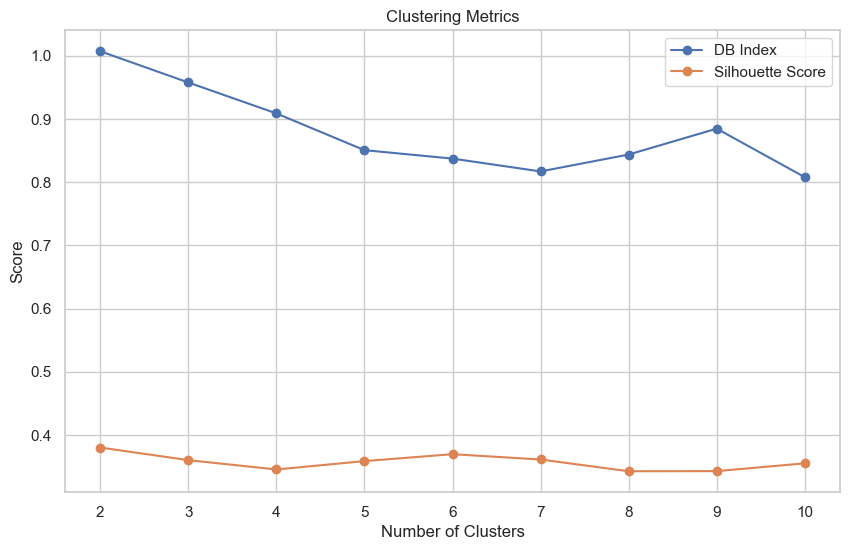

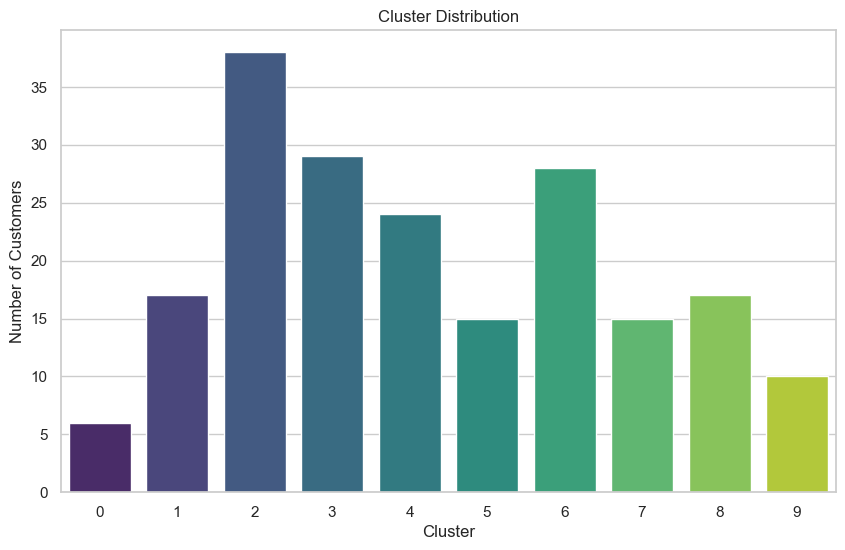

Optimal number of clusters: 10
Best Davies-Bouldin Index: 0.8080


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers_df = pd.read_csv(r'C:\Users\shaik\Desktop\newintern\Customers.csv')
transactions_df = pd.read_csv(r'C:\Users\shaik\Desktop\newintern\Transactions.csv')

# Merge datasets
merged_data = pd.merge(transactions_df, customers_df, on='CustomerID', how='left')

# Feature Engineering
customer_features = merged_data.groupby('CustomerID').agg(
    total_spent=('TotalValue', 'sum'),
    total_transactions=('TransactionID', 'count'),
    avg_spending=('TotalValue', 'mean')
).reset_index()

# Normalize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features.drop(columns=['CustomerID']))

# Clustering with K-Means
best_db_index = float('inf')
best_k = 0
best_model = None
cluster_metrics = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(scaled_features)
    db_index = davies_bouldin_score(scaled_features, clusters)
    silhouette_avg = silhouette_score(scaled_features, clusters)
    cluster_metrics.append({'k': k, 'DB Index': db_index, 'Silhouette Score': silhouette_avg})

    if db_index < best_db_index:
        best_db_index = db_index
        best_k = k
        best_model = kmeans

# Add cluster labels to the dataset
customer_features['Cluster'] = best_model.labels_

# Save clustering metrics
metrics_df = pd.DataFrame(cluster_metrics)
metrics_df.to_csv(r'C:\Users\shaik\Desktop\newintern\ClusteringMetrics.csv', index=False)

# Visualization
sns.set(style="whitegrid")

# Visualize DB Index and Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(metrics_df['k'], metrics_df['DB Index'], marker='o', label='DB Index')
plt.plot(metrics_df['k'], metrics_df['Silhouette Score'], marker='o', label='Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Clustering Metrics')
plt.legend()
plt.savefig(r'C:\Users\shaik\Desktop\newintern\ClusteringMetricsPlot.png')
plt.show()

# Cluster Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=customer_features, x='Cluster', palette='viridis')
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.savefig(r'C:\Users\shaik\Desktop\newintern\ClusterDistribution.png')
plt.show()

# Save clustered data
customer_features.to_csv(r'C:\Users\shaik\Desktop\newintern\ClusteredCustomers.csv', index=False)

# Summary Report
print(f"Optimal number of clusters: {best_k}")
print(f"Best Davies-Bouldin Index: {best_db_index:.4f}")
